# Control Flow and Functions

## Control flow statements

Control flow statements control the order of execution of different pieces of code. They can be used to do things like make sure code is only run when certain conditions are met, to iterate through data structures, to repeat something until a specified event happens, etc. Control flow statements are frequently used when writing functions or carrying out complex data transformation.

### `if`, `if-else`, and `if-elif-else` statements

if and if-else blocks allow you to structure the flow of execution so that certain expressions are executed only if particular conditions are met.

In [1]:
import random 

x = random.random() # generate random number between 0 and 1
if x < 0.5:
    print("heads")
else:
    print("tails")


tails


`if` statements can be used by themselves, without a matching `else`:

In [2]:
x = random.randint(1,20) # generate random integer between 1 and 20 (inclusive)
if x == 20:
    print("Critical hit!")
# since there's no else statement nothing happens if x != 20

`elif` is used when there are multiple alternative possibilities.  The final `else`` matches any condition not specified in an if or elif statement:

In [3]:
 # random.choice returns a random element of the input sequence
x = random.choice(["A", "T", "G", "C", "N", "R", "Y", "S", "W", "K", "M", "."]) 
# see https://www.bioinformatics.org/sms/iupac.html for IUPAC nucleotide codes


if x == "A":
    base = "Adenine"
elif x == "T":
    base = "Thymine"
elif x == "G":
    base = "Guanine"
elif x == "C":
    base = "Cytosine"
elif x == ".":
    base = "gap"
else:
    base = "ambiguous nucleotide"
    
print(x, "represents", base)
    

R represents ambiguous nucleotide


### `match` and `case` expressions

Python version 3.10 introduced two new keywords called `match` and `case` that provide for "structural pattern" matching, which can be used in a manner to multiple if-elif-else statments (see https://docs.python.org/3/tutorial/controlflow.html#match-statements).

In [4]:
x = random.choice(["A", "T", "G", "C", "N", "R", "Y", "S", "W", "K", "M", "."]) 


match x:
    case "A": 
        base = "Adenine"
    case "T": 
        base = "Thymine"
    case "G": 
        base = "Guanine"
    case "C": 
        base = "Cytosine"
    case ".": 
        base = "gap"
    case _:  # default action
        base = "an ambiguous nucleotide"  


print(x, "represents", base)

M represents an ambiguous nucleotide


Match / case statements allow for some syntax that makes them more appealing than if else statements. For example, you can match on multiple patterns in a single case statement using a vertical bar `|` to represents "or" logic.

In [5]:
x = random.choice(["A", "T", "G", "C", "N", "R", "Y", "S", "W", "K", "M", "."]) 

match x:
    case "A" | "G" | "R":
        nuctype = "purine"
    case "T" | "C" | "Y":
        nuctype = "pyrimidine" 
    case ".":
        nuctype = "gap (non base)"
    case _:
        nuctype = "ambiguous base"

print(f"{x} represents a {nuctype}")

T represents a pyrimidine


Pattern matching with match/case statements extends beyond literal matches. For example you can match on the structure of a match.

In [6]:
sentence = input("Enter a sentence: ")  # this will prompt you for input

match sentence.split():
    case []:
        print("You didn't enter any words at all.")
    case [word1]:
        print("Your sentence had one word!")
    case [word1, word2]:
        print("Your sentence had two words!")
    case _:
        print("Your sentence had more than two words!")

You didn't enter any words at all.


For more examples of match/case statements see the [Structural Matching tutorial](https://peps.python.org/pep-0636/#matching-sequences) from the "enhancement proposal" that was created when this new feature was proposed.

### `for` loops

A `for` statement iterates over the elements of a sequence (such as string or list). A common use of `for` statements is to carry out the same set of computations on each element of a sequence. 

In [7]:
words = ["how", "now", "brown", "cow"]
reversed_words = []

for word in words:
    reversed_words.append(word[::-1])

reversed_words

['woh', 'won', 'nworb', 'woc']

### Using `range()` in loops

If you want to explicitly iterate over integer values you can use the `range()` function in a for loop:

In [8]:
for i in range(10):
    print(i, "squared is", i**2)

0 squared is 0
1 squared is 1
2 squared is 4
3 squared is 9
4 squared is 16
5 squared is 25
6 squared is 36
7 squared is 49
8 squared is 64
9 squared is 81


A typical "C-style" for loop where you use integers to iterate over elements is written like so:

In [9]:
words = ["how", "now", "brown", "cow"]

for i in range(len(words)):
    print(f"Word {i}: {words[i]}")

Word 0: how
Word 1: now
Word 2: brown
Word 3: cow


### The `enumerate()` function

Often times you want both a counter and the actual items from a list, string, or other iterable. This can be conveniently accomplished using the `enumerate()` function as so:

In [10]:
words = ["how", "now", "brown", "cow"]

for (i, word) in enumerate(words):  # note tuple unpacking
    print(f"Word {i}, uppercase: {word.upper()} ") 

Word 0, uppercase: HOW 
Word 1, uppercase: NOW 
Word 2, uppercase: BROWN 
Word 3, uppercase: COW 


### `while` statements 
A while statement iterates as long as the condition statement it contains is true.

In [11]:
i = 0
while i <= 10:
    print(i, "squared is", i**2)
    i += 1

0 squared is 0
1 squared is 1
2 squared is 4
3 squared is 9
4 squared is 16
5 squared is 25
6 squared is 36
7 squared is 49
8 squared is 64
9 squared is 81
10 squared is 100


### `break` statements

A break statement allows you to exit a `for` or `while` loop even if it hasn’t completed. This is useful for ending a control statement when some criteria has been satisfied. `break` statements are usually nested in `if`` statements.

In [12]:
for i in range(100):
    if random.random() < 0.10:  # 
        print("That's enough. I'm tired of looping.")
        break
    print(i, "squared is", i**2)

0 squared is 0
1 squared is 1
2 squared is 4
3 squared is 9
4 squared is 16
5 squared is 25
6 squared is 36
7 squared is 49
That's enough. I'm tired of looping.


`break` is often used to end otherwise infinite loops.

In [13]:
# simulate number of coin flips before you get a tail
# pick a random float between 0 and 1, of < 0.5 treat as head
nheads = 0
while True:   # a potentially infinite loop unless we call break
    if random.random() >= 0.5:
        break
    nheads += 1

# the match/case statement only gets executed once we
# break from the while loop
match nheads:
    case 0:
        print("I got zero heads. :-(")
    case 1:
        print("I got one head.")
    case _:
        print(f"I got {nheads} heads in a row!")
    

I got 3 heads in a row!


### Continue statements

A `continue` statement skips immediately to the next iteration in a loop.

In [14]:
text = """
This is a line.
And another...

Did you see the blank line there?
Let's filter it out."""

nonempty_lines = []
for line in text.splitlines():
    if not line.strip(): # a non-empty string returns True
        continue
    nonempty_lines.append(line)

print(f"There were {len(nonempty_lines)} non-empty lines in the text.")


There were 4 non-empty lines in the text.


### List comprehensions

Iteration is such a fundamental concept in programming that Python includes a special syntax called a "list comprehension" that allows us to iterate over a sequence, applying some computation of interest, and collect the results of each of those computations into a list.  The list comprehension syntax looks like this:

```python
# apply computation to every item in the seq, return the results in a new list
[computation(item) for item in seq]
```

We can think of a list comprehension as having two parts separated by  `for` keyword.  The code to the left of the `for` keyword`` specifies what you're doing, and the part to the right specifies what you're doing it with.

Here are some examples:

In [15]:
from math import sqrt

squares = [sqrt(i) for i in range(10)]
squares

[0.0,
 1.0,
 1.4142135623730951,
 1.7320508075688772,
 2.0,
 2.23606797749979,
 2.449489742783178,
 2.6457513110645907,
 2.8284271247461903,
 3.0]

#### Conditionals in list comprehensions

List comprehension also support a conditional form, as illustrated below:

In [16]:
vals = [4, 9, 16, -25]

[sqrt(x) for x in vals if x >= 0]  # calculate square roots but only for values greater than 0

[2.0, 3.0, 4.0]

List comprehensions also support an "if-else" form but this requires you move the if-else on the left side of the `for` keyword:

In [17]:
# the nan ("not a number") object, defined in the math library,
# is a useful way to represent the result of numerical computations that
# might produce invalid results for some inputs
from math import nan 

[sqrt(x) if x > 0 else nan for x in vals]

[2.0, 3.0, 4.0, nan]

Unfortunately, the "if-else" form of list comprehensions isn't quite as readable as the standard form or the single if form.

Python also supports equivalent comprehension syntax to create sets and dictionaries. Here's an illustration of a set comprehension statement.

In [18]:
dickens = """It was the best of times, it was the worst of times, it was the age of wisdom, it was the age of foolishness..."""

wordset = {word for word in dickens.split()}
wordset


{'It',
 'age',
 'best',
 'foolishness...',
 'it',
 'of',
 'the',
 'times,',
 'was',
 'wisdom,',
 'worst'}

## Writing functions

Functions are organized, reusable units of code that perform a specific computation of interest. Like variables, functions provide an important layer of abstraction that helps us generalize computations.

The general form of defining a function in Python of a single variable:

```python
def func_name(x):
    """ Document string. """
    # computations here
    return result
```


In [19]:
import math

def area_of_circle(radius):
    """Calculates area of string of given radius."""
    return math.pi * radius**2

Having defined this function we can then use it in our code:

In [20]:
area_of_circle(3)

28.274333882308138

Note that in our function defintion `radius` is the "input" or "argument" to area_of_circle you can think of it as a temporary variable name that refers to the value that the caller of our function passed to `area_of_circle`. Note that the variable names are "local" to the function. In this example, the variable `radius` doesn't exist outside of the function unless we've already defined a `radius` object.  Also the argument `radius` within the function is independent of any similarly named `radius` we might have already defined.  The code below illustrates this:

In [21]:
radius = 10 # this assignment doesn't effect radius in area_of_circle

area_of_circle(1) 

3.141592653589793

Because we included a "docstring" in our function definition, we (or someone else) can use the "help" function to pull up info on our function.

In [22]:
help(area_of_circle)

Help on function area_of_circle in module __main__:

area_of_circle(radius)
    Calculates area of string of given radius.



#### Functions of two or more variables

If you want to define a function with more than one input, argument are just listed after the first:

```python
def func_name(x, y):
    # function of two input
    return result
```

In [23]:
def area_of_rectangle(width, height):
    return width * height

area_of_rectangle(10, 5)

50

Arguments can have default values. If the default is suitable, the input for that argument does not need to be specified that they're often referred to as "optional arguments"

In [24]:
def flip_coin(probhead=0.5):
    """Simulate a coin flip, where prob. of heads is given by `probhead`.
    
    Defaults to a fair coin.
    """
    if random.random() <= probhead:
        return "heads"
    else:
        return "tails"


In [25]:
# simulate 5 fair coin flips
[flip_coin() for i in range(5)]

['heads', 'tails', 'tails', 'heads', 'tails']

In [26]:
# simulate 5 biased coin flips
[flip_coin(0.75) for i in range(5)]

['tails', 'heads', 'heads', 'tails', 'heads']

When writing arguments that take a mix of required and optional argument, the required arguments must come first.

In [27]:
# simulate multiple flips, number of flips "n" is a required argument
# this version works
def multi_flips(n, probhead = 0.5):
    return [flip_coin(probhead) for i in range(n)]


# this version would not work because positional arguments need to come
# before keyword arguments
# def multi_flips(probhead = 0.5, n):
#     return [flip_coin(probhead) for i in range(n)]

In [28]:
multi_flips(6)

['heads', 'tails', 'tails', 'heads', 'heads', 'heads']

## Breaking a complex problem up into parts using functions

A good strategy when faced with a complex computing problem is to break that problem up into a set of simpler sub-problems. We implement functions to solve the sub-problems and then write a wrapper function that call the supporting function to solve the original "higher order" problem.

Let's illustrate this strategy by expanding on the yeast colony image segmentation and quantification task we sketched out in the example Jupyter notebook titled [image_analysis_example.ipynb](https://github.com/Bio724D/Bio724D_2023_2024/blob/main/python_notebooks/image_analysis_example.ipynb).  In that example we showed how we could start with an image like this:

![yeast colonies](./yeast_colonies.png)

and segment it into black and white sub-image like this from which we measured the areas of each colony:

![subcolonies](./segmented_colonies.png)

#### Sketching out a solution

If you review the `image_analysis_example.ipynb` notebook you'll see that our image analysis steps involved:

1. Loading the image
2. Thresholding the image
3. Finding the regions in each image that corresponded to a colony
4. Analyzing the colony regions

Let's take these steps and write "mock" functions to represent each sub-problem as well as the pipeline as a whole.

In [29]:
def load_image():
    print("loading image")

def threshold_image():
    print("thresholding image")

def define_regions():
    print("defining regions")

def analyze_regions():
    print("analyzing regions")


def segment_and_measure():
    load_image()
    threshold_image()
    define_regions()
    analyze_regions()


The code above sketches out the logic of our pipeline. While it doesn't actually implement the key tasks, it will help us as we organize our code.  And we can actually run it at this point!

In [30]:
segment_and_measure()

loading image
thresholding image
defining regions
analyzing regions


Now let's actually implement each subfunction. The implementation of the sub-functions will largely follow the code in the earlier notebook, but we'll add some functionality along the way and for the latter steps where we identify and analyze the regions we'll make use of some functions from the [scikit-image](https://scikit-image.org/) library.

#### Library imports

In [31]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import image 
import skimage

#### load_image()

The prior notebook showed the steps for loading an image using the `image.imread` function defined in matplolib. 

Since `imread` already exists, we don't really need to define our own function unless we want to add some additional functionality. For interactive analysis it can be useful to plot the image when we load it. So let's add some functionality to our `load_image` function that will allow us to optionally plot the image after loading.  In the spirit of encpasulating complexity, let's also write a helper function to do the plotting (`plot_image`) that allows use to specify whether the image should be plotted as RGB or grayscale (and the bitdepth). 

In [32]:
def load_image(fname, plot=False, grayscale=True, bitdepth=8):
    """Load a grescale image, returning it as an array.
    
    * if plot=True, generate an image plot at time of loading
    * bitdepth set's appropriate scaling of greyscale pixel intensities
    """
    img = image.imread(fname)
    if plot:
        plot_image(img, grayscale=grayscale, bitdepth=bitdepth)
    return img


def plot_image(img, grayscale=True, bitdepth=8, axes=None):
    if axes is None:
        axes = plt  # If no axes specified, using pyplot imshow
                    # otherwise will use the imshow method of provided axis
    if grayscale:
        axes.imshow(img, cmap="gray", vmin=0, vmax = 2**bitdepth - 1)
    else:
        axes.imshow(img)
     # return the "current" plotting axis if we want to use it again    
    return plt.gca() 




##### Testing our function

In [33]:
# test our function with keyword defaults
img = load_image("yeast_colonies.jpg")
img

array([[167, 166, 168, ..., 165, 164, 165],
       [167, 167, 166, ..., 166, 165, 164],
       [167, 167, 167, ..., 166, 164, 165],
       ...,
       [167, 168, 166, ..., 166, 165, 166],
       [167, 167, 168, ..., 165, 166, 165],
       [166, 166, 166, ..., 165, 166, 165]], dtype=uint8)

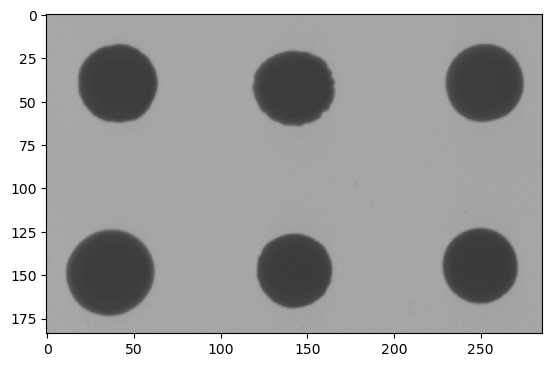

In [34]:
# now w/plot = True
img = load_image("yeast_colonies.jpg", plot=True)

<Axes: >

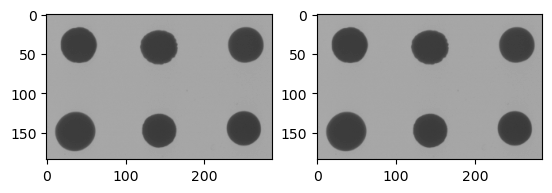

In [35]:
# test of our plot_image helper function separate from load_image
# confirm that it works as expected when we tell it which image axes to plot on

fig, axes = plt.subplots(1, 2)
plot_image(img, axes=axes[0])
plot_image(img, axes=axes[1])

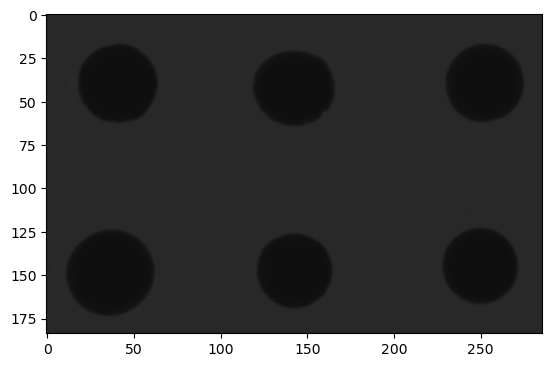

In [36]:
# the actual bit depth is 8-bits (the default), but let's see what happens if 
# we change it to a "wrong" value
img = load_image("yeast_colonies.jpg", plot=True, bitdepth=10)

##### Updating segment_and_measure

Having implemented and tested our `load_image` function, we need to update `segment_and_measure` to reflect the new call signature of `load_image`.

In [37]:
# note change in how we call `load_image`
def segment_and_measure(fname):
    img = load_image(fname)
    threshold_image()
    define_regions()
    analyze_regions()
    return img


In [38]:
# And test segment_and_measure 
img = segment_and_measure("yeast_colonies.jpg")

thresholding image
defining regions
analyzing regions


#### threshold_image()

Now let's implement and test our threshold_image function. Again, this is pretty simple code -- just a comparison step between our image array and the threshold. Once again, we add a keyword argument to plot the result. However, we've now turned this image into just True/False values so the bitdepth is 1.

In [39]:
def threshold_image(img, threshold, plot=False):
    """Threshold a grayscale image at the given threshold value.
    Assumes dark objects against a light background.
    """
    binimg =  img < threshold
    if plot:
        plot_image(binimg, grayscale=True, bitdepth=1)
    return binimg
        

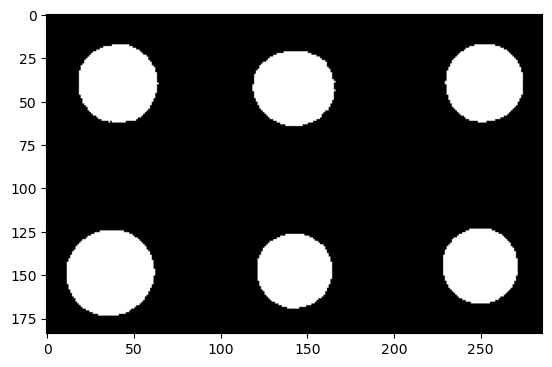

In [40]:
binimg = threshold_image(img, 125, plot=True)

#### A helper function for determining thresholds

In the examples above, I used a threshold of 125. But how did I determine that?  One way to do so is to look at a histogram of pixel intensities and use your judgement to determine a good cutoff value that separates background from foreground. Let's implementing a function to help us do that. 

NOTE: there are variety of algorithms that have been proposed for automatic thresholding, several of which are available in the skimage library. We won't explore those here, but if we were developing a fully automated image analysis pipeline we would likely want to look into that functionality.

In [41]:
def plot_image_histogram(img, bins=None):
    """Generate a pixel intensity histogram of an image. """
    plt.hist(img.ravel(), bins=bins)  
    plt.xlabel("Intensity")
    plt.ylabel("Count")
    plt.title("Histogram of pixel intensity\n(darker = smaller values)")



The optional bins argument of `plt.hist()` is by default `None` which means it will try and infer the best number of bins here we define our own optional argument to overridge this

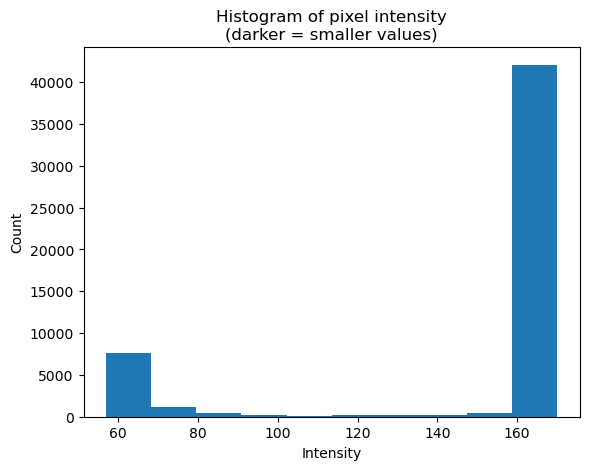

In [42]:
plot_image_histogram(img)

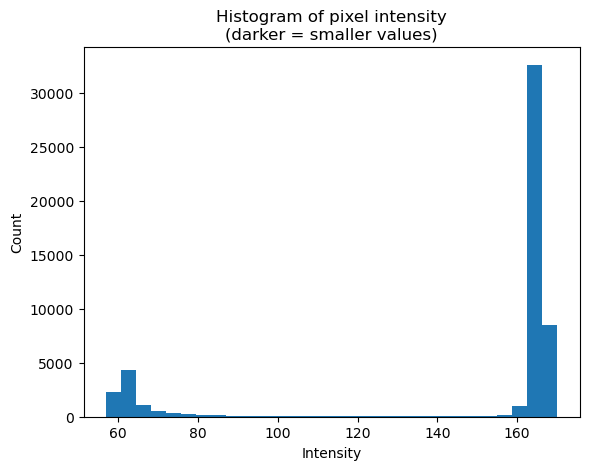

In [43]:
plot_image_histogram(img,30)

Having implemented this helper function, let's integrate it into `segment_and_measure`.  We do so by creating a new keyword argument `threshold`.  If threshold is None, we generate the histogram plot and exit the function early.  Otherwise, we assume the user has given us an appropriate threshold value and we pass it to `threshold_image`.

In [44]:
def segment_and_measure(fname, threshold=None):
    img = load_image(fname)

    if threshold is None:
        plot_image_histogram(img)
        print("Please specify a threshold for binarizing the image (see histogram).")
        return   # empty return statement returns None 
    
    binimg = threshold_image(img, threshold)
    
    define_regions()
    analyze_regions()
    return img, binimg

And as always, we test our revised function.

Please specify a threshold for binarizing the image (see histogram).


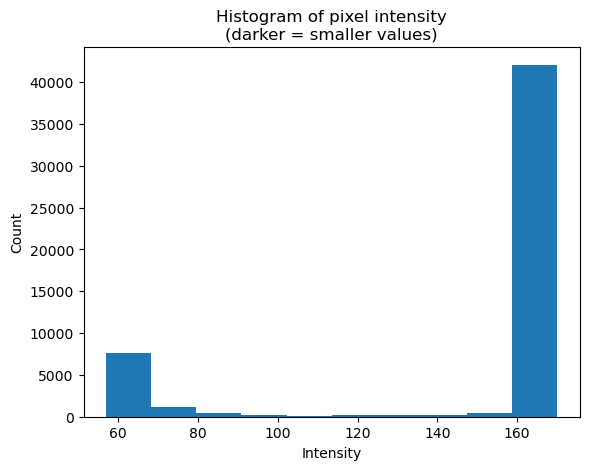

In [45]:
# testing without specifying a threshold
vals = segment_and_measure("yeast_colonies.jpg")

In [46]:
# and now testing with the threshold specified
vals = segment_and_measure("yeast_colonies.jpg", threshold=125)

defining regions
analyzing regions


#### define_regions()

In the `image_analysis_example.ipynb` notebook we delineated the regions to be analyzed by cutting the thresholded image into pieces, where each piece contained a colony of interest.  This worked for our small example, but isn't in general a good solution as we can't guarantee the colonies we're analyzing we'll always be in the same location in the image or even that we're always analyzing the same number of colonies. 

To solve this issue we turn to some functionality implemented in the `skimage` library. The `skimage.measure.label` function finds "connected regions" in a binary immage,  where "connected region" means region of non-zero (True in our case) pixels that are all neighbors of each other or are connected by chains of neighbors.  Visually, you can think of this function as finding all the islands of white pixels in our binarized (thresholded) image.

We can plot the labeled image as RGB, and each labeled region will be assigned it's own color.

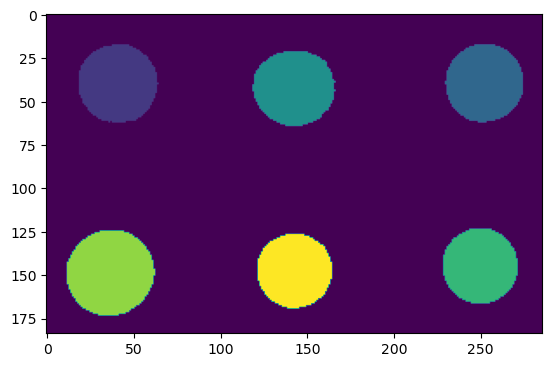

In [47]:
# plot the labeled image as a RGB image
# each label gets its own color
lblimg = skimage.measure.label(binimg)
plt.imshow(lblimg)

In [48]:
def define_regions(binimg, plot=False):
    """Label objects in a binarized image. """
    lblimg = skimage.measure.label(binimg)
    if plot:
        plot_image(lblimg, grayscale=False)
    return lblimg
        

##### A nicer visualization of  labeled regions

`skimage` provides an even nicer way to depict labeled image, implemented in the `label2rgb` fuction. This function takes a labeled image and turns it into an RGB image which we can plot, as shown below. 

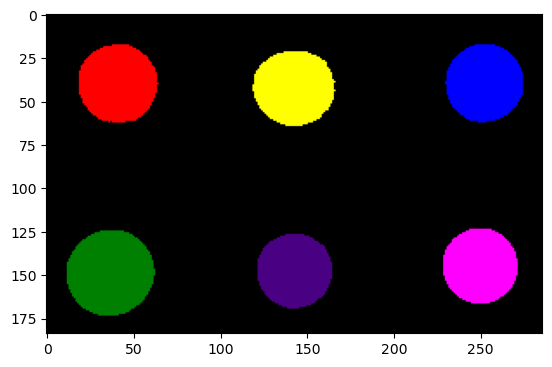

In [49]:
lbloverlay = skimage.color.label2rgb(lblimg)
plt.imshow(lbloverlay)

If we pass our original image to the `image=` argument of `label2rgb` it will plot the label regions as semi-transparent "overlays" on top of the original image.

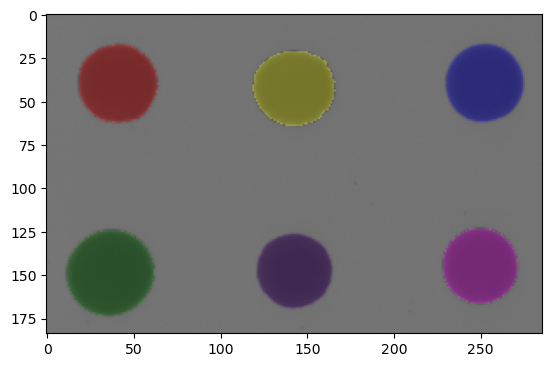

In [50]:
lbloverlay = skimage.color.label2rgb(lblimg, image=img)
plt.imshow(lbloverlay)

#### Updating segment_and_measure

Let's update `segment_and_measure` to include the signature for our updated `define_regions` and let's also add some functionality to plot the labeled images overlain on the original image.

In [51]:
def segment_and_measure(fname, threshold=None, plot=False):
    img = load_image(fname)

    if threshold is None:
        plot_image_histogram(img)
        print("Please specify a threshold for binarizing the image (see histogram).")
        return   # empty return statement returns None 
    binimg = threshold_image(img, threshold)

    lblimg = define_regions(binimg)

    if plot:
        lbloverlay = skimage.color.label2rgb(lblimg, image=img)
        plt.imshow(lbloverlay)

    analyze_regions()
    return img, binimg, lblimg

And as always, we test our updated function.

analyzing regions


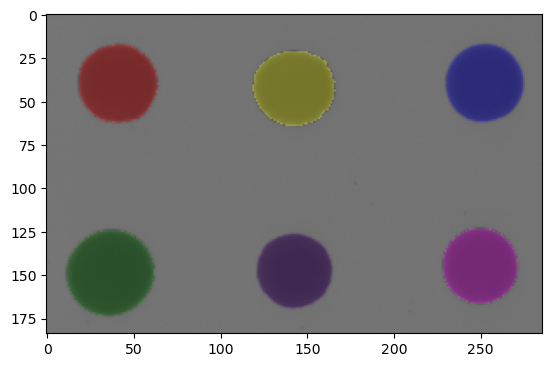

In [52]:
segment_and_measure("yeast_colonies.jpg", 125, plot=True)
pass

#### analyze_regions()

Our final step is to implement a function to analyze the regions we've segemented.  Here again `skimage` makes our lives easy by providing a function `skimage.measure.regionprops` that will return information on labeled regions in an image.  There is also a funciton `skimage.measure.regionprops_table` that will return the region information in the form of a dictionary we can use for access or pass to a Panda's data frame to create a table.

In this example we examine the "centroid" (geometric mean) and the area of each region. For a full list of region properties see the [skimage document on regionprops](https://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops).

In [53]:
regions = skimage.measure.regionprops(lblimg)

[(r.label, r.centroid, r.area) for r in regions]


[(1, (40.04954128440367, 40.94311926605505), 1635.0),
 (2, (39.73852922690132, 252.3419233186675), 1591.0),
 (3, (42.58783364369957, 142.55617628801986), 1611.0),
 (4, (144.93265993265993, 249.9043771043771), 1485.0),
 (5, (148.90932117527862, 36.59625126646403), 1974.0),
 (6, (147.71690427698573, 142.83638832315003), 1473.0)]

In [54]:
# same data as a dictionary
skimage.measure.regionprops_table(lblimg, properties=["label", "centroid", "area"])

{'label': array([1, 2, 3, 4, 5, 6]),
 'centroid-0': array([ 40.04954128,  39.73852923,  42.58783364, 144.93265993,
        148.90932118, 147.71690428]),
 'centroid-1': array([ 40.94311927, 252.34192332, 142.55617629, 249.9043771 ,
         36.59625127, 142.83638832]),
 'area': array([1635., 1591., 1611., 1485., 1974., 1473.])}

In [55]:
# we can take the dictionary returned by regionprops_table and pass
# it to a pandas dataframe to create a nice table

import pandas as pd

regiontbl = skimage.measure.regionprops_table(lblimg, properties=["label", "centroid", "area"])
pd.DataFrame(regiontbl)

,label,centroid-0,centroid-1,area
0,1,40.049541,40.943119,1635.0
1,2,39.738529,252.341923,1591.0
2,3,42.587834,142.556176,1611.0
3,4,144.932660,249.904377,1485.0
4,5,148.909321,36.596251,1974.0
5,6,147.716904,142.836388,1473.0


We'll implement our `analyze_regions` function as a light wrapper around the two skimage functions discussed above.

In [56]:
def analyze_regions(lblimg, properties=["label", "centroid", "area"]):
    regions = skimage.measure.regionprops(lblimg)
    regiontbl = skimage.measure.regionprops_table(lblimg, properties=properties)
    return regions, regiontbl


In [57]:
# let's test our function
regions, tbl = analyze_regions(lblimg)

Finally, let's write a helper function to plot our labeled image with text  at the centroid of each labeled region indicating the assignment of regions to labels.

In [58]:

def plot_labelled_image(img, lblimg, regions, axes=None):
    lbloverlay = skimage.color.label2rgb(lblimg, image=img)
    axes = plot_image(lbloverlay, grayscale=False, axes=axes)
    for region in regions:
        y, x = region.centroid
        axes.text(x, y, region.label, color='red')

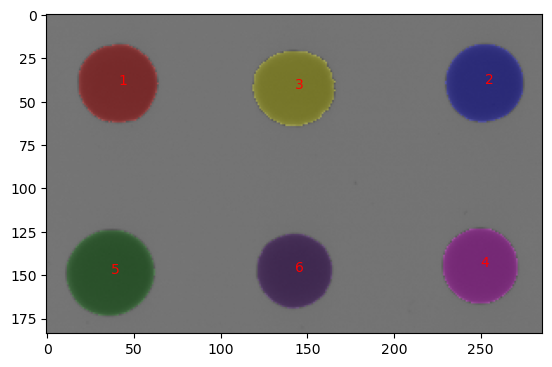

In [59]:
# test our helper function
plot_labelled_image(img, lblimg, regions)

In [60]:
# update our segment_and_measure function

def segment_and_measure(fname, threshold=None, plot=False):
    img = load_image(fname)

    if threshold is None:
        plot_image_histogram(img)
        print("Please specify a threshold for binarizing the image (see histogram).")
        return   # empty return statement returns None 
    binimg = threshold_image(img, threshold)

    lblimg = define_regions(binimg)

    regions, regiontbl = analyze_regions(lblimg)
    
    if plot:
        plot_labelled_image(img, lblimg, regions)
    
    return img, binimg, lblimg, regions, pd.DataFrame(regiontbl)

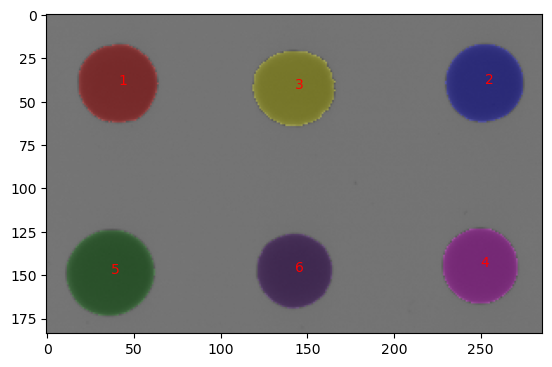

In [61]:
# test our updated segment_and_measure
img, binimg, lblimg, regions, regiontbl = segment_and_measure("yeast_colonies.jpg", threshold=125, plot=True)


In [62]:
# let's look at our region data in tabular format
regiontbl

,label,centroid-0,centroid-1,area
0,1,40.049541,40.943119,1635.0
1,2,39.738529,252.341923,1591.0
2,3,42.587834,142.556176,1611.0
3,4,144.932660,249.904377,1485.0
4,5,148.909321,36.596251,1974.0
5,6,147.716904,142.836388,1473.0


### Testing with other inputs

Things look good on our simple test image. Let's try a few example using different image files

1. `example-easy-plate.jpg` -- a "simple" example where the colonies are well defined but we have more of them
2. `example-mixed-plate.jpg` -- a more difficult image to analyze where we have a mix of strong and weak growing colonies. 


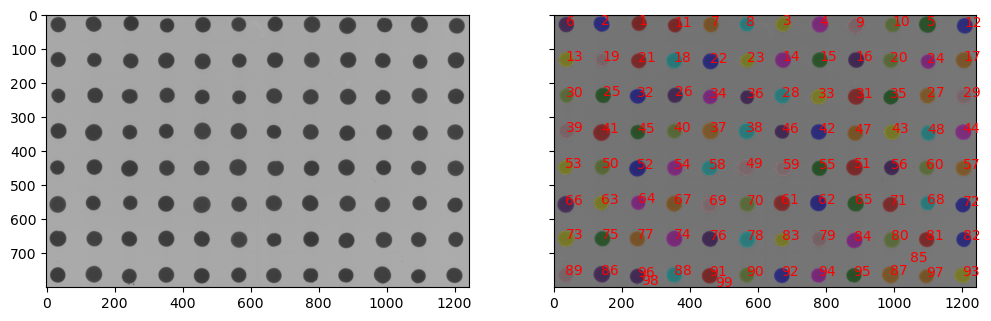

In [63]:
# The "easy" plate

img, binimg, lblimg, regions, regiontbl = segment_and_measure("example-easy-plate.jpg", threshold=125)

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True)
plot_image(img, grayscale=True, axes=axes[0])
plot_labelled_image(img, lblimg, regions, axes=axes[1])

fig.set_size_inches(12,5)  # make our plots larger since we're laying them out side by side

pass


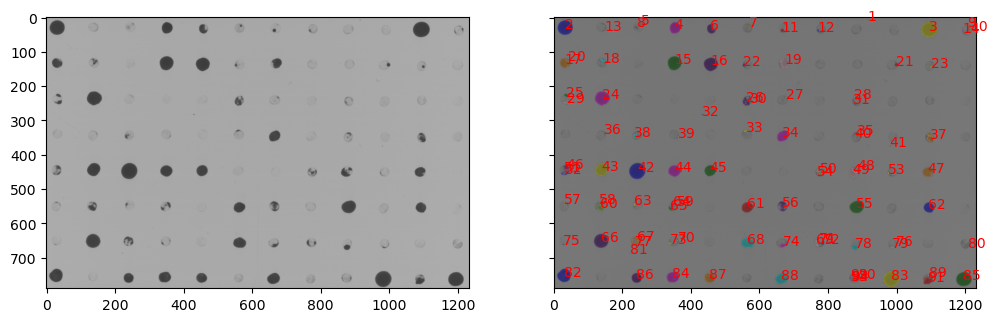

In [64]:
# And now the mixed plate

img, binimg, lblimg, regions, regiontbl = segment_and_measure("example-mixed-plate.jpg", threshold=125)

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True)
plot_image(img, grayscale=True, axes=axes[0])
plot_labelled_image(img, lblimg, regions, axes=axes[1])

fig.set_size_inches(12,5)  # make our plots larger since we're laying them out side by side

pass


As we see, these additional test images reveal some new challenges. For example, even very small colonies or spots in the image can be called as distint regions.  Also, in the case where there is non-uniform growth the regions are called as distinct.  

In we developed this pipeline further we would probably want to implement additional functionality, like setting a minimum area for calling something a region of interest, or implementing some sort of technique for grouping regions based on their proximity.  These are too complex for this particular illustrative example, but are challenges that can be overcome.





### The final version of the pipeline

Finally, here's our pipeline all in one code cell. 

As this point we'd probably want to stick this in it's own Python code file (e.g. `segmenter.py`) so we could use it as a library.  We might even want to add some wrapper code that would allow us to call segment_and_measure as a command line program.  However, those are tasks that are beyond the scope of this particular tutorial so we'll save them for another time.

In [65]:
import numpy as np
from matplotlib import pyplot as plt
import skimage
import pandas as pd


def load_image(fname, plot=False, grayscale=True, bitdepth=8):
    """Load a grescale image, returning it as an array.
    
    * if plot=True, generate an image plot at time of loading
    * bitdepth set's appropriate scaling of greyscale pixel intensities
    """
    img = image.imread(fname)
    if plot:
        plot_image(img, grayscale=grayscale, bitdepth=bitdepth)
    return img


def plot_image(img, grayscale=True, bitdepth=8, axes=None):
    if axes is None:
        axes = plt  # If no axes specified, using pyplot imshow
                    # otherwise will use the imshow method of provided axis
    if grayscale:
        axes.imshow(img, cmap="gray", vmin=0, vmax = 2**bitdepth - 1)
    else:
        axes.imshow(img)
     # return the "current" plotting axis if we want to use it again    
    return plt.gca() 


def plot_image_histogram(img, bins=None):
    """Generate a pixel intensity histogram of an image. """
    plt.hist(img.ravel(), bins=bins)  
    plt.xlabel("Intensity")
    plt.ylabel("Count")
    plt.title("Histogram of pixel intensity\n(darker = smaller values)")


def threshold_image(img, threshold, plot=False):
    """Threshold a grayscale image at the given threshold value.
    Assumes dark objects against a light background.
    """
    binimg =  img < threshold
    if plot:
        plot_image(binimg, grayscale=True, bitdepth=1)
    return binimg


def define_regions(binimg, plot=False):
    """Label objects in a binarized image. """
    lblimg = skimage.measure.label(binimg)
    if plot:
        plot_image(skimage.color.label2rgb(lblimg), grayscale=False)
    return lblimg


def analyze_regions(lblimg, properties=["label", "centroid", "area"]):
    """Return properties of objects from a label image."""
    regions = skimage.measure.regionprops(lblimg)
    regiontbl = skimage.measure.regionprops_table(lblimg, properties=properties)
    return regions, regiontbl


def plot_labelled_image(img, lblimg, regions, axes=None):
    lbloverlay = skimage.color.label2rgb(lblimg, image=img)
    axes = plot_image(lbloverlay, grayscale=False, axes=axes)
    for region in regions:
        y, x = region.centroid
        axes.text(x, y, region.label, color='red')


def segment_and_measure(fname, threshold=None, plot=False):
    img = load_image(fname)

    if threshold is None:
        plot_image_histogram(img)
        print("Please specify a threshold for binarizing the image (see histogram).")
        return   # empty return statement returns None 
    binimg = threshold_image(img, threshold)

    lblimg = define_regions(binimg)

    regions, regiontbl = analyze_regions(lblimg)
    
    if plot:
        plot_labelled_image(img, lblimg, regions)
    
    return img, binimg, lblimg, regions, pd.DataFrame(regiontbl)